In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 1. Load Data
df = pd.read_csv('gym_footfall_preprocessed.csv')

In [3]:
# 2. Feature Selection & Preprocessing
# Define the target variable
target = 'daily_gym_footfall'

# Define features to drop to avoid multicollinearity and non-numeric issues
features_to_drop = [
    'date', 
    'daily_gym_footfall', 
    'effective_capacity',       # Redundant: Correlated with equipment_availability_ratio
    'weather_impact_factor',    # Redundant: Correlated with weather_condition_normal
    'exam_intensity',           # Redundant: Correlated with exam_phase_none
    'maintenance_flag'          # Redundant: Correlated with maintenance_severity columns
]

# Create X (Features) and y (Target)
X = df.drop(features_to_drop, axis=1)
y = df[target]

In [4]:
# 3. Split Data
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 4. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [9]:
# 5. Make Predictions & Evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score:         {r2:.4f}")

Model Performance Metrics
Root Mean Squared Error (RMSE): 8.88
R-squared (R2) Score:         0.8959


In [10]:
# 6. Analyze Drivers (Coefficients)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\nTop 5 Positive Influencers:")
print(coefficients.head())
print("\nTop 5 Negative Influencers:")
print(coefficients.tail())


Top 5 Positive Influencers:
                     Feature  Coefficient
10        gym_adoption_ratio    86.237438
5                is_gym_open    49.409213
13           exam_phase_none    22.086098
12        exam_phase_midterm    11.235378
16  weather_condition_normal     8.289373

Top 5 Negative Influencers:
                           Feature  Coefficient
0                      day_of_week    -0.090001
2                            month    -0.100571
15    weather_condition_heavy_rain    -1.968798
14  weather_condition_extreme_heat    -6.741067
7              academic_load_index   -18.155824


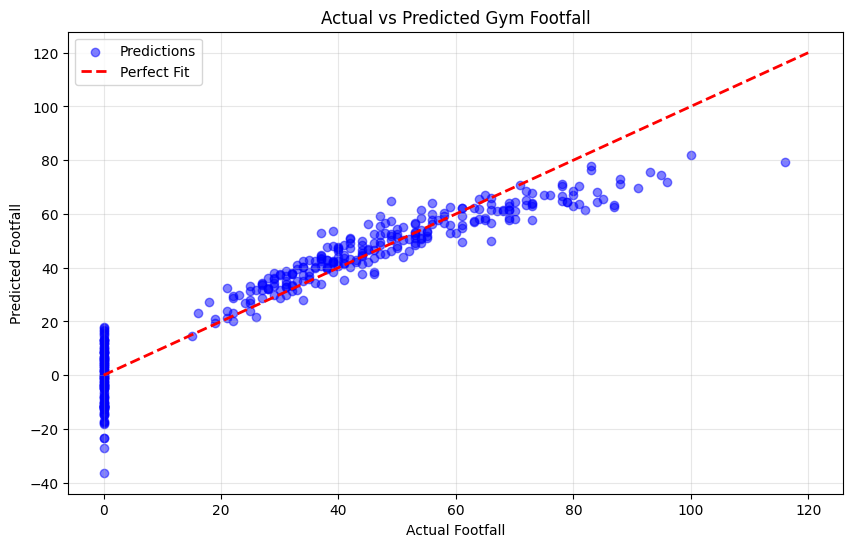

In [11]:
# 7. Visualization
plt.figure(figsize=(10, 6))

# Scatter plot of Actual vs Predicted
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predictions')

# Perfect prediction line (Diagonal)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Fit')

plt.xlabel('Actual Footfall')
plt.ylabel('Predicted Footfall')
plt.title('Actual vs Predicted Gym Footfall')
plt.legend()
plt.grid(True, alpha=0.3)

# Save the plot
plt.savefig('final_model_results.png')
plt.show()